In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [3]:
def fun(x):
    return 4 / (1 + x**2)

In [4]:
def gauss_legendre_integration(n):
    nodes, weights = np.polynomial.legendre.leggauss(n)
    
    x_values = 0.5 * (nodes + 1)
    
    fx_values = fun(x_values)
    
    integral_approx = np.sum(weights * fx_values)
    
    integral_approx *= 0.5
    
    return integral_approx

In [42]:
n_values = np.arange(2, 500)
errors = []

for n in n_values:
    integral_approx = gauss_legendre_integration(n)
    error = np.abs(np.pi - integral_approx) / np.pi
    errors.append(error)

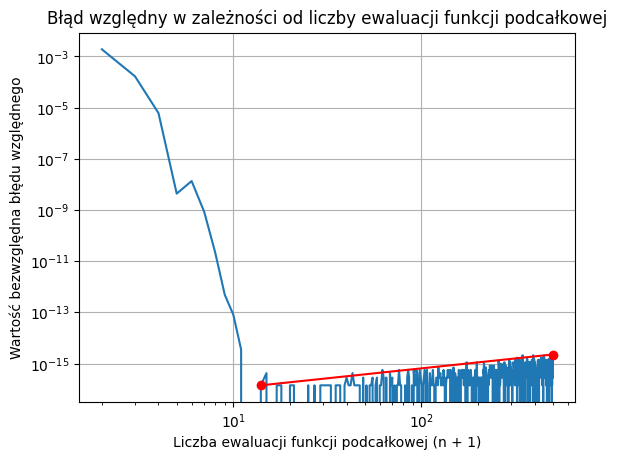

In [52]:

plt.plot(n_values, errors)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Liczba ewaluacji funkcji podcałkowej (n + 1)')
plt.ylabel('Wartość bezwzględna błędu względnego')
plt.title('Błąd względny w zależności od liczby ewaluacji funkcji podcałkowej')

plt.plot([n_values[12], n_values[496]], [errors[12], errors[496]], 'ro-')

plt.grid(True)
plt.show()

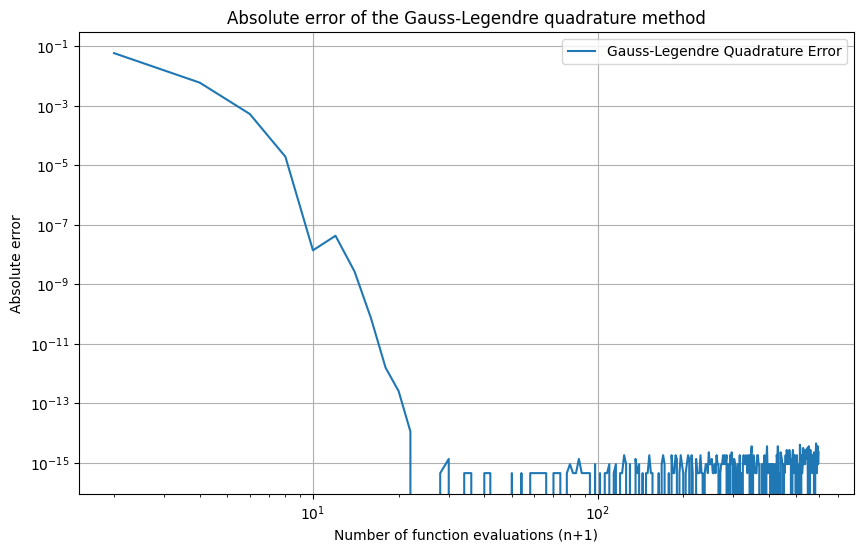

In [40]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from numpy.polynomial.legendre import leggauss

# Definicja funkcji podcałkowej
def f(x):
    return 4.0 / (1 + x**2)

# Prawdziwa wartość całki (pi)
pi_true = np.pi

# Zakres n dla obliczeń kwadratury Gaussa-Legendre’a
N_values = range(1, 300)

# Błąd bezwzględny w zależności od liczby ewaluacji funkcji podcałkowej
errors_gauss_legendre = []

# Obliczanie całki i błędów dla kwadratury Gaussa-Legendre’a
for n in N_values:
    # Pobieramy węzły i wagi dla kwadratury Gaussa-Legendre'a
    nodes, weights = leggauss(n)
    # Przeskalowanie węzłów i wag do przedziału [0, 1]
    nodes_rescaled = 0.5 * nodes + 0.5
    weights_rescaled = 0.5 * weights
    # Przybliżona wartość całki
    gauss_legendre_approx = np.sum(weights_rescaled * f(nodes_rescaled))
    # Obliczanie błędu bezwzględnego
    error = abs(gauss_legendre_approx - pi_true)
    errors_gauss_legendre.append(error)

# Liczba ewaluacji funkcji to (2 * n), ponieważ używamy n węzłów i n wag
evaluations = [2 * n for n in N_values]

# Rysowanie wykresu błędu bezwzględnego
plt.figure(figsize=(10, 6))
plt.loglog(evaluations, errors_gauss_legendre, label='Gauss-Legendre Quadrature Error')
plt.xlabel('Number of function evaluations (n+1)')
plt.ylabel('Absolute error')
plt.title('Absolute error of the Gauss-Legendre quadrature method')
plt.legend()
plt.grid(True)
plt.show()

